# Redes Complexas 2020/1 - Covid-19
### Professor: Gentil Veloso
### Alunos: Denilson Santos Sobrinho Júnior e Pedro Henrique



## 1 - Importação das Bibliotecas

In [7]:
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline

## 2 -  Importação dos dados

In [8]:
# Importando arquivo CSV dos dados

data = pd.read_csv('https://raw.githubusercontent.com/denilsonssj1/daata/master/data/data.csv', low_memory=False)

# Mostrando uma pequena amostra dos dados da base de dados

data.head()

regiao estado municipio  coduf  codmun  codRegiaoSaude nomeRegiaoSaude  \
0  Brasil    NaN       NaN     76     NaN             NaN             NaN   
1  Brasil    NaN       NaN     76     NaN             NaN             NaN   
2  Brasil    NaN       NaN     76     NaN             NaN             NaN   
3  Brasil    NaN       NaN     76     NaN             NaN             NaN   
4  Brasil    NaN       NaN     76     NaN             NaN             NaN   

         data  semanaEpi populacaoTCU2019  casosAcumulado  casosNovos  \
0  25/02/2020          9        210147125               0           0   
1  26/02/2020          9        210147125               1           1   
2  27/02/2020          9        210147125               1           0   
3  28/02/2020          9        210147125               1           0   
4  29/02/2020          9        210147125               2           1   

   obitosAcumulado  obitosNovos  Recuperadosnovos  emAcompanhamentoNovos  \
0                0            0               NaN                    NaN   
1                0            0               NaN                    NaN   
2                0            0               NaN                    NaN   
3                0            0               NaN                    NaN   
4                0            0               NaN                    NaN   

   interior/metropolitana  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN

## 3 - Processamento Inicial dos Dados


In [25]:
# Filtrando apenas os códigos dos estados da Região Norte
regiao_norte_codes = data[data['regiao']=='Norte']['estado'].unique()
print(regiao_norte_codes)

# Filtrando todos os municípios da região
regiao_norte = data.loc[(data['regiao']== 'Norte') & (data['codmun'].isna()) & (data['semanaEpi'] >=13), ['estado','semanaEpi', 'casosNovos']]

regiao_norte = regiao_norte.groupby(['estado', 'semanaEpi'],as_index = False).sum()
#print(regiao_norte[regiao_norte['estado'] == 'TO'] )
casos_acumulados_list = []
list_dict = []
# Calculando os casos acumulados de cada estado para as semanas 
for index, row in regiao_norte.iterrows():
    if row['semanaEpi'] == 13:
        soum = 0
    soum = soum + row['casosNovos']
    if row['semanaEpi'] == 31:
        list_dict.append({'estado': row['estado'], 'totalCasos': soum })
    casos_acumulados_list.append(soum)
casos_frequencia_relativa_list = []

for index, row in regiao_norte.iterrows():
    for estado_total in list_dict:
        if estado_total['estado'] == row['estado']:
            value = 100* round(row['casosNovos']/ estado_total['totalCasos'],4) # 4 Casas decimais
            #percent = str("%f" % ())
            casos_frequencia_relativa_list.append("{}%".format(value))

        
# Adicionando os casos totais ao Dataframe
regiao_norte['casosAcumulado'] = casos_acumulados_list
regiao_norte['frequenciaRelativa'] = casos_frequencia_relativa_list
regiao_norte
csv = regiao_norte.to_csv('nada.csv')

'''
y = regiao_norte[regiao_norte['estado'] == 'TO']['casosNovos'].tolist()
x = regiao_norte[regiao_norte['estado'] == 'TO']['semanaEpi'].tolist()
print(y)
print(x)
fig,ax = plt.subplots(1,1)
ax.hist([1,2,3,4], bins=[1,2,3,4])
ax.set_title("Cases in city %s" % ('TO'))
#ax.set_xticks([4,3,2,1])
ax.set_xlabel('marks')
ax.set_ylabel('no. of students')
plt.show()
'''
'''
for estados_code in regiao_norte_codes:
    x = regiao_norte[regiao_norte['estado'] == estados_code]['semanaEpi'].tolist()
    y = regiao_norte[regiao_norte['estado'] == estados_code]['casosNovos'].tolist()
    fig,ax = plt.subplots(1,1)
    ax.hist(y, bins = x)
    ax.set_title("Cases in city %s" % (estados_code))
    ax.set_xticks(x)
    ax.set_xlabel('marks')
    ax.set_ylabel('no. of students')
    plt.show()
'''

['RO' 'AC' 'AM' 'RR' 'PA' 'AP' 'TO']


'\nfor estados_code in regiao_norte_codes:\n    x = regiao_norte[regiao_norte[\'estado\'] == estados_code][\'semanaEpi\'].tolist()\n    y = regiao_norte[regiao_norte[\'estado\'] == estados_code][\'casosNovos\'].tolist()\n    fig,ax = plt.subplots(1,1)\n    ax.hist(y, bins = x)\n    ax.set_title("Cases in city %s" % (estados_code))\n    ax.set_xticks(x)\n    ax.set_xlabel(\'marks\')\n    ax.set_ylabel(\'no. of students\')\n    plt.show()\n'

## 4 - Mostrando o Grafo com os estados da região norte


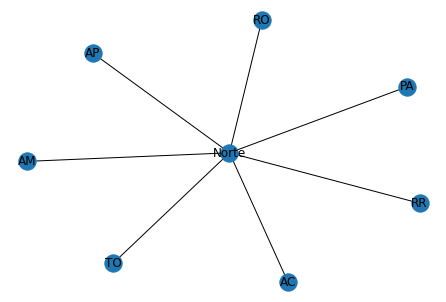

In [26]:
# Realizando a exclusão de tuplas e de colunas que são irrelevantes 
G = nx.from_pandas_edgelist(m_graph, source='regiao', target='estado')
nx.draw(G, with_labels=True)

## 5 - Mostrando dados do histograma de casos 

## 6 -  Criando modelo de Grafo

## 7 - Criando Dados Para Mostra

## 5 - Apresentação dos Resultados